# Advanced Triangle Manipulation

In [1]:
import chainladder as cl

This example demonstrates several advanced data manipulation features of the
Triangle class including:

    1. Delayed calculation using `virtual_columns`
    2. Advanced `groupby` functionality
    3. Custom sorting using `loc`

Let's suppose we want to look at the loss ratios for the top 10 commercial auto
carriers (by premium volume) as compared to the rest of the industry.


In [2]:
clrd = cl.load_sample('clrd')
clrd = clrd[clrd['LOB']=='comauto']

# Create a loss ratio virtual column
clrd['LossRatio'] = lambda clrd: clrd['IncurLoss'] / clrd['EarnedPremDIR']

# Identify the largest companies (by premium) for 1997
top_10 = clrd['EarnedPremDIR'].groupby('GRNAME').sum().latest_diagonal
top_10 = top_10.loc[..., '1997', :].to_frame().nlargest(10)

# Group any companies together that are not in the top 10
clrd = clrd.groupby(clrd.index['GRNAME'].map(
    lambda x: x if x in top_10.index else 'Remainder')).sum()

# Sort by company volume, but keep Remainder as last entry
clrd = clrd.loc[top_10.index.to_list() + ['Remainder']].iloc[::-1]



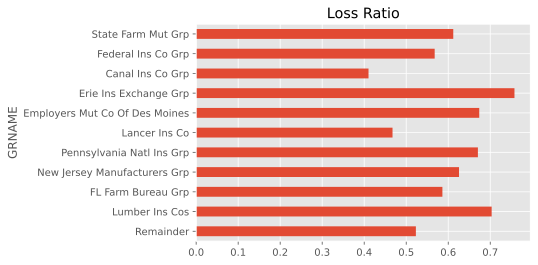

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'


ax = clrd.latest_diagonal.sum('origin')['LossRatio'].plot(
    kind='barh', title='Loss Ratio');

In [9]:
from myst_nb import glue
glue("plot_advanced_triangle", ax.get_figure(), display=False)